<a href="https://colab.research.google.com/github/AHartNtkn/DS-Unit-2-Kaggle-Challenge/blob/master/module1/DS7_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [X] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [X] Get your validation accuracy score.
- [X] Get and plot your feature importances.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [X] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
inputTrain, inputValidate, outputTrain, outputValidate = train_test_split(
    train.drop('status_group', axis=1), train['status_group'], random_state=42, train_size=0.8, test_size=0.2)

inputTrain.shape, inputValidate.shape, outputTrain.shape, outputValidate.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np

In [0]:
inputTrain.select_dtypes(exclude='number').nunique()

In [0]:
# NOTE: This is !!!REALLY BAD!!! way to ogranize your "wrangling". Consider the following;

# Dates are strings by default, so they need to be converted into actual dates.
# Doesn't seem like such a problem since you can just do that put that in the wrangle function.
# But then construction_year has missing values which I might want to replace with a mean value.
# This mean comes from the training set. But I can't get that value until I convert the dates,
# which I just put in wrangle. Now, wrangle relies on wrangle already having been run on the
# training-set.

# Wrangling should, at the very least, be split between training-set-dependent wrangling
# (this may be where feature engineering happens as well) and training-set-independent wrangling 
# This organization assumes all wrangling is training-set-independent, which is obviously not true.

# The central coordinates of the various regions.
regionCoordinates = {
    "Iringa": [-8.39052, 35.158],
    "Mara": [-1.68839, 34.1191],
    "Manyara": [-4.71281, 36.9732], 
    "Mtwara": [-10.7808, 39.1344], 
    "Kagera": [-1.95044, 31.4711], 
    "Tanga": [-5.22144, 38.2794], 
    "Shinyanga": [-3.40933, 33.3317], 
    "Tabora": [-5.2866, 32.8186], 
    "Pwani": [-7.25261, 38.6558], 
    "Ruvuma": [-10.7364, 36.2633], 
    "Kilimanjaro": [-3.76266, 37.6439], 
    "Rukwa": [-7.02022, 31.3437], 
    "Mwanza": [-2.46398, 32.798], 
    "Kigoma": [-4.79782, 30.406], 
    "Lindi": [-9.46355, 38.3884], 
    "Dodoma": [-5.90244, 35.9229], 
    "Arusha": [-2.99761, 35.9389], 
    "Mbeya": [-8.25589, 33.3244], 
    "Singida": [-5.7467, 34.4923], 
    "Morogoro": [-7.89879, 37.001], 
    "Dar es Salaam": [-6.89611, 39.2762]
    }

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # Change dates to dates
    X["date_recorded"] = pd.to_datetime(X["date_recorded"])
    X["construction_year"] = pd.to_datetime(X["construction_year"].replace(0,np.NaN),format="%Y")

    # There are about 20709 missing values in the construction year. This will replace those with averages at around 1996
    averageConstructionYear = pd.to_datetime(X["construction_year"].dropna().values.astype(np.int64).mean())
    X["construction_year"] = X["construction_year"].fillna(averageConstructionYear)
    
    # Create new feature corresponding to the age of a pump.
    X["age"] = round((X["date_recorded"] - X["construction_year"]).dt.days / 365.25, 1)

    # Convert time-related types back to numbers
    X["construction_year"] = X["construction_year"].dt.year
    X["month_recorded"] = X["date_recorded"].dt.month.astype(str)
    X["year_recorded"] = X["date_recorded"].dt.year
    X["date_recorded"] = X["date_recorded"].astype(np.int64)

    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    
    # Replace missing coordinates with region centers
    X['latitude'] = [
      regionCoordinates[X['region'][x]][0]
      if X['latitude'][x] == -2e-08
      else X['latitude'][x]
      for x in X.T ]

    X['longitude'] = [
      regionCoordinates[X['region'][x]][1]
      if X['longitude'][x] == 0
      else X['longitude'][x]
      for x in X.T ]
            
    # quantity & quantity_group are duplicates, so drop one
    # Delete low-quality features
    # id,recorded_by, district_code, and region_code don't communicate useful information
    LQFeats = ["id","recorded_by","quantity_group",'district_code','region_code']
    X = X.drop(LQFeats, axis=1)

    # Get rid of high-cardenality features
    cardinality = X.select_dtypes(exclude='number').nunique()
    highCardCatFeats = cardinality[cardinality > 50].index.tolist()

    # return the wrangled dataframe
    return X.drop(highCardCatFeats, axis=1)

inputTrain = wrangle(inputTrain)
inputValidate = wrangle(inputValidate)
test = wrangle(test)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce

In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(min_samples_leaf=90, max_leaf_nodes=110)
)

In [0]:
pipeline.fit(inputTrain, outputTrain)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'scheme_management', 'permit',
                                     'extraction_type', 'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'waterpoint_type',...
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=Non

In [0]:
print("Validation Score: ", pipeline.score(inputValidate, outputValidate))

Validation Score:  0.742003367003367


In [0]:
import matplotlib.pyplot as plt

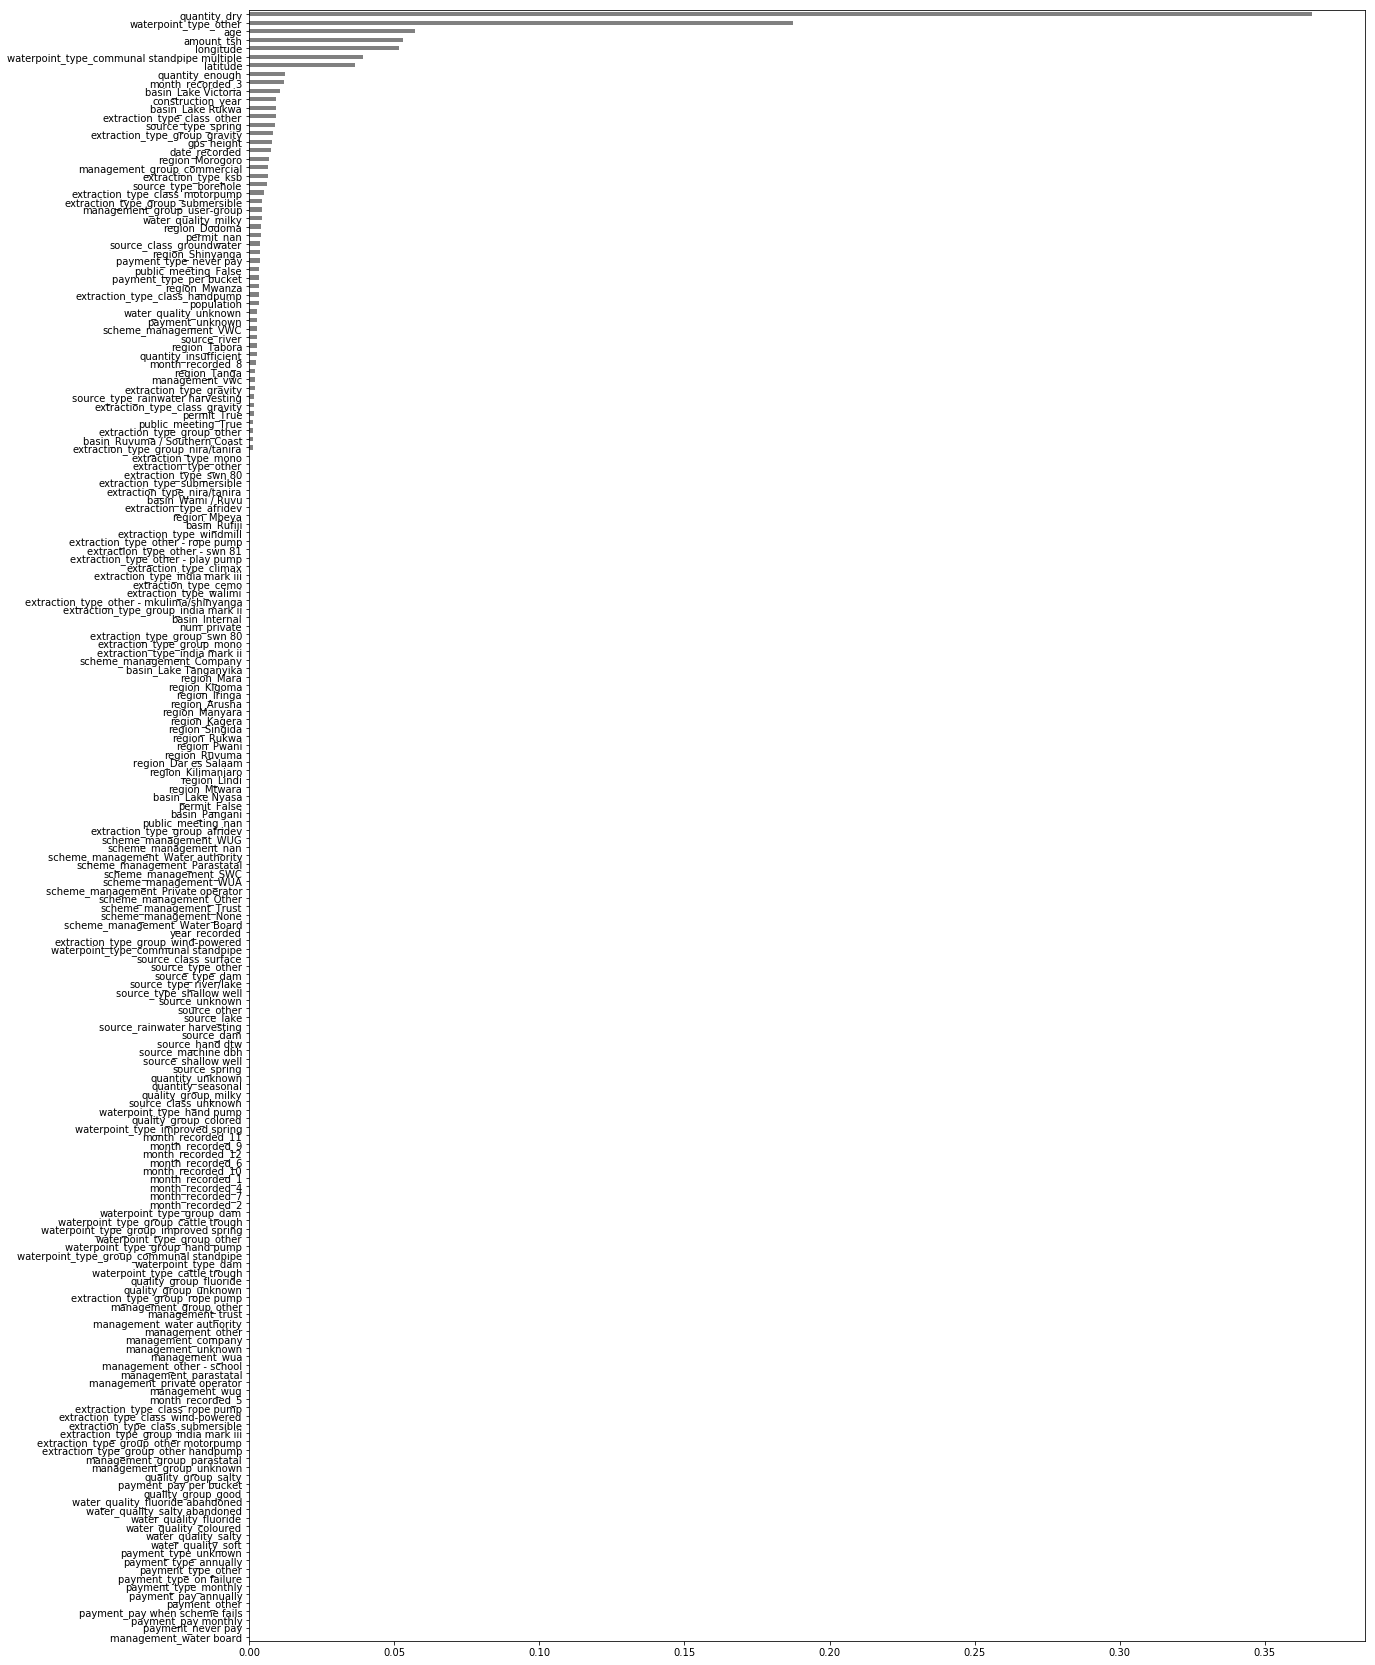

In [24]:
dt = pipeline.named_steps.decisiontreeclassifier
encoder = pipeline.named_steps.onehotencoder
encoded_columns = encoder.transform(inputTrain).columns
importance = pd.Series(dt.feature_importances_, encoded_columns)
plt.figure(figsize=(20,30))
importance.sort_values().plot.barh(color='grey')